# 2. Preliminaries

## 2.1. Data Manipulation

In [1]:
import torch

### 2.1.1. Getting Start

In [2]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [3]:
x.numel()

12

In [4]:
x.shape

torch.Size([12])

In [5]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [6]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
torch.randn(3, 4)

tensor([[-0.5946,  1.2505,  0.1362, -0.3636],
        [ 1.5094,  1.4342,  1.1621, -0.7365],
        [-0.1178, -2.3402,  1.8121, -1.0193]])

In [9]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 2.1.2. Indexing and Slicing

In [10]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [11]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [12]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 2.1.3. Operations

In [13]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [14]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [15]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [16]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [17]:
X.sum()

tensor(66.)

### 2.1.4. Broadcasting

In [18]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [19]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 2.1.5. Saving Memory

In [20]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [21]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 5190319296
id(Z): 5190319296


In [22]:
before = id(X)
X += Y
id(X) == before

True

### 2.1.6. Conversion to Other Python Objects

In [23]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [24]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

### 2.1.7. Summary

The scripts above are about pytorch's tensor class. It include various utilities mentioned ubove and more.

### 2.1.8. Exercises

In [25]:
X > Y, X < Y

(tensor([[False,  True,  True,  True],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]),
 tensor([[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]]))

In [26]:
X = torch.arange(12).reshape((2, 2, 3))
Y = torch.arange(2).reshape((1, 2, 1))
X, Y, X + Y

(tensor([[[ 0,  1,  2],
          [ 3,  4,  5]],
 
         [[ 6,  7,  8],
          [ 9, 10, 11]]]),
 tensor([[[0],
          [1]]]),
 tensor([[[ 0,  1,  2],
          [ 4,  5,  6]],
 
         [[ 6,  7,  8],
          [10, 11, 12]]]))

## 2.2. Data Preprocessing

### 2.2.1. Reading the Dataset

In [27]:
import os

os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [28]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


### 2.2.2. Data Preparation

In [29]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [30]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


### 2.2.3. Conversion to the Tensor Format

In [31]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

### 2.2.4. Discussion

Now, I know how to partition data columns, impute missing variables, and load pandas data into tensors. In Section 5.7, I will pick up some more data processing skills. Data processing with real-world datasets can be more complex, so advanced tools and efficient algorithms are required. Also, beacause real-world datasets are often plagued by outliers, faulty measurements and recording errors, data visualization tools can help me to manually inspect the data and develop intuitions about the types of problems I may need to address.

## 2.3. Linear Algebra

In [32]:
import torch

### 2.3.1. Scalars

In [33]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2. Vectors

In [34]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [35]:
x[2]

tensor(2)

In [36]:
len(x)

3

In [37]:
x.shape

torch.Size([3])

### 2.3.3. Matrices

In [38]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [39]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [40]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4. Tensors

In [41]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5. Basic Properties of Tensor Arithmetic

In [42]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [43]:
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [44]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 2.3.6. Reduction

In [45]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [46]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

In [47]:
A.shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [48]:
A.shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [49]:
A.sum(axis=[0, 1]) == A.sum()

tensor(True)

In [50]:
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [51]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

### 2.3.7. Non-Reduction Sum

In [52]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [53]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [54]:
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

### 2.3.8. Dot Products

In [55]:
y = torch.ones(3, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [56]:
torch.sum(x * y)

tensor(3.)

### 2.3.9. Matrix-Vector Products

In [57]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

### 2.3.10. Matrix-Matrix Multiplication

In [58]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

### 2.3.11. Norms

In [59]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [60]:
torch.abs(u).sum()

tensor(7.)

In [61]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

### 2.3.12. Discussion

- Scalars, vectors, matrices, and tensors are the basic mathematical objects used in linear algebra and have zero, one, two, and an arbitrary number of axes, respectively.
- Tensors can be sliced or reduced along specified axes via indexing, or operations such as sum and mean, respectively.
- Elementwise products are called Hadamard products. By contrast, dot products, matrix–vector products, and matrix–matrix products are not elementwise operations and in general return objects having shapes that are different from the the operands.
- Compared to Hadamard products, matrix–matrix products take considerably longer to compute (cubic rather than quadratic time).
- Norms capture various notions of the magnitude of a vector (or matrix), and are commonly applied to the difference of two vectors to measure their distance apart.

### 2.3.13. Exercises

In [62]:
A = torch.randn(3, 4)
A.T.T == A

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [63]:
A, B = torch.randn(3, 4), torch.randn(3, 4)
A.T + B.T == (A + B).T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True]])

In [64]:
# (A + A.T).T = A.T + A.T.T (exercise 2)
# A.T.T = A (exercise 1) -> A.T + A.T.T = A.T + A = A + A.T + A
A = torch.randn(3, 3)
A + A.T == (A + A.T).T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [65]:
# My answer: 2
# Reason: Python's len function returns length of the outermost list
len(torch.randn(2, 3, 4))

2

In [66]:
# My answer: 0
# Reason: Same as above
A = torch.randn(3, 4, 5)
len(A) == A.size(axis=0), len(A) == A.size(axis=1), len(A) == A.size(axis=2)

(True, False, False)

In [67]:
A = torch.arange(12, dtype=torch.float32).reshape(3, 4)
A / A.sum(axis=1)
# The code has error because A is not diagonal. len(A[n]) is 4 but len(A.sum(axis=1)) is 3

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 1

In [68]:
# Let we shoud go to (3.0, 4.0) from (0.0, 0.0)
A = torch.tensor([3.0, 4.0])
# In terms of avenues and streets, we can use A.sum()
# If we can travel diagonally, the distance we have to go is be computed by torch.norm(A)
A.sum(), torch.norm(A)

(tensor(7.), tensor(5.))

In [69]:
A = torch.randn(2, 3, 4)
# Expect: (axis=0, (3, 4), (axis=1, (2, 4)), (axis=2, (3, 4)))
A.sum(axis=0).shape, A.sum(axis=1).shape, A.sum(axis=2).shape

(torch.Size([3, 4]), torch.Size([2, 4]), torch.Size([2, 3]))

In [70]:
# My answer: 1 (number)
# Reason: I think the function 'norm' returns only number

torch.linalg.norm(torch.randn(2, 3, 4)).shape

torch.Size([])

In [71]:
# Let we multiply a * b size matrix with b * c size matrix.
# Memory usage is a * b + b * c.
# Number of computing is (b * a * c) multiplying, (b * a * c) adding. (computing speed is affected the number of computing)
A = torch.randn(2**10, 2**16)
B = torch.randn(2**16, 2**5)
C = torch.randn(2**5, 2**14)
A@B@C

tensor([[-2297.1863,   703.8255, -2893.8708,  ...,  -771.2812,   131.9026,
           786.4297],
        [  709.2348,  -596.1061,  -462.0089,  ...,  1660.5129,  2802.3711,
          -363.4123],
        [ 1399.4364,  -944.8942,   131.0079,  ...,   -52.6075,  2656.0610,
          2713.0686],
        ...,
        [ -960.4954, -2228.5081, -3922.7886,  ..., -3007.8110,  2714.2803,
          1364.4907],
        [ 1173.7048,  -101.3638,   825.7952,  ...,   885.0240, -1379.1892,
          -371.2669],
        [  218.3605,  -661.4561,  -353.0112,  ...,  1044.7029,  -273.6768,
           950.1650]])

In [72]:
# The dimensionality is 100 * 200 * 3, I think.
A = torch.randn(100, 200)
B = torch.randn(100, 200)
C = torch.randn(100, 200)

torch.stack([A, B, C], dim=2).shape

torch.Size([100, 200, 3])

## 2.5. Automatic Differentiation

In [73]:
import torch

### 2.5.1. A Simple Function

In [74]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [75]:
x.requires_grad_(True)
x.grad

In [76]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [77]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [78]:
x.grad == 4 * x

tensor([True, True, True, True])

In [79]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.5.2. Backward for Non-Scalar Variables

In [80]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))
x.grad

tensor([0., 2., 4., 6.])

### 2.5.3. Detaching Computation

In [81]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [82]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 2.5.4. Gradients and Python Control Flow

In [83]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [84]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [85]:
a.grad == d / a

tensor(True)

### 2.5.5. Discussion

- Attach gradients to those variables with respect to which we desire derivatives.
- Record the computation of the target value.
- Execute the backpropagation function
- Access the resulting gradient.

### 2.5.6. Exercises

In [86]:
%matplotlib inline
from d2l import torch as d2l

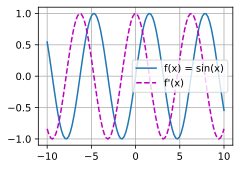

In [87]:
f = lambda x: torch.sin(x)

x = torch.linspace(-10, 10, 100, requires_grad=True)
y = f(x)

y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()], 
         legend=['f(x) = sin(x)', "f'(x)"])

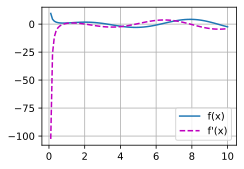

In [88]:
f = lambda x: (torch.log(x**2) * torch.sin(x)) + x.pow(-1)

x = torch.linspace(0.1, 10, 100, requires_grad=True)
y = f(x)

y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()], 
         legend=['f(x)', "f'(x)"])

# 3. Linear Neural Networks for Regression

## 3.1. Linear Regression

In [89]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

### 3.1.2. Vectorization for Speed

In [90]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [91]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.05284 sec'

In [92]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00076 sec'

### 3.1.3. The Normal Distribution and Squared Loss

In [93]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

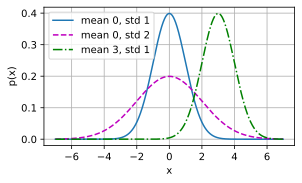

In [94]:
x = np.arange(-7, 7, 0.01)

params = [(0, 1), (0, 2), (3, 1)]

d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

## 3.2. Object-Oriented-Design for Implementation

In [95]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 3.2.1. Utilities

In [96]:
def add_to_class(Class):
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [97]:
class A:
    def __init__(self):
        self.b = 1

a = A()

In [98]:
@add_to_class(A)
def do(self):
    print('Class attribute "b" is', self.b)

a.do()

Class attribute "b" is 1


In [99]:
class HyperParameters:
    def save_hyperparameters(self, ignore=[]):
        raise NotImplemented

In [100]:
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


In [101]:
class ProgressBoard(d2l.HyperParameters):
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()
    
    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

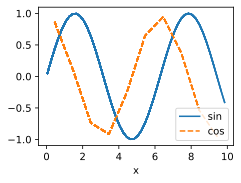

In [102]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

### 3.2.2. Models

In [103]:
class Module(nn.Module, d2l.HyperParameters):
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

### 3.2.3. Data

In [104]:
class Module(nn.Module, d2l.HyperParameters):
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

### 3.2.4. Training

In [105]:
class Trainer(d2l.HyperParameters):
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError

### 3.2.5. Summary

To highlight the object-oriented design for our future deep learning implementation, the above classes simply show how their objects store data and interact with each other. D2L library is a lightweight toolkit that makes structured modeling for deep learning easy.

## 3.4. Linear Regression Implementation from Scratch

In [106]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 3.4.1. Defining the Model

In [107]:
class LinearRegressionScratch(d2l.Module):
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

In [108]:
@d2l.add_to_class(LinearRegressionScratch)
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

### 3.4.2. Defining the Loss Function

In [109]:
@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

### 3.4.3. Defining the Optimization Algorithm

In [110]:
class SGD(d2l.HyperParameters):
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [111]:
@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

### 3.4.4. Training

In [112]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

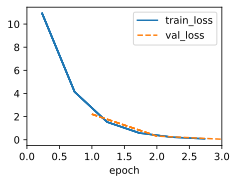

In [113]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [114]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.1043, -0.2025])
error in estimating b: tensor([0.2087])


### 3.4.5. Summary

In this section, we took a significant step towards designing deep learning systems by implementing a fully functional neural network model and training loop. We compose a Python object that contains all relevant components for training a model. While this is not yet a professional-grade implementation it is perfectly functional. we will see how to do this both more concisely and more efficiently.

# 4. Linear Neural Networks for Classification

## 4.1. Softmax Regression

### 4.1.1. Classification

Problem
- Each input consists of a $2 \times 2$ grayscale image.
- Each piexel can be represented value with a single scalar, giving four features $x_1, x_2, x_3, x_4$.
- Each image belongs to one among the categories “cat”, “chicken”, and “dog”.

In general, classification problems do not come with natural orderings among the classes. Fortunately, statisticians long ago invented a simple way to represent categorical data: the one-hot encoding. A one-hot encoding is a vector with as many components as we have categories

#### 4.1.1.1. Linear Model

In order to estimate the conditional probabilities associated with all the possible classes, we need a model with multiple outputs, one per class.

In our case, since we have 4 features and 3 possible output categories, we need 12 scalars to represent the weights ($w$ with subscripts), and 3 scalars to represent the biases ($b$ with subscripts).

This yields: $o_n = (\sum_k x_k w_{nk}) + b_n$

#### 4.1.1.2. The Softmax

Another way to accomplish this goal (and to ensure nonnegativity) is to use an exponential function $P(y = i) \propto \exp(o_i)$. This does indeed satisfy the requirement that the conditional class probability increases with increasing $o_i$, it is monotonic, and all probabilities are nonnegative. We can then transform these values so that they add up to 1 by dividing each by their sum. This process is called normalization. Putting these two pieces together gives us the softmax function:

$\hat{y} = \text{softmax}(o) \quad \text{where} \quad \hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}$

Note that the largest coordinate of $o$ corresponds to the most likely class according to $\hat{y}$. Moreover, because the softmax operation preserves the ordering among its arguments, we do not need to compute the softmax to determine which class has been assigned the highest probability. Thus,

$\argmax_j \hat{y}_j = \argmax_j o_j$

#### 4.1.1.3. Vectorization

To improve computational efficiency, we vectorize calculations in minibatches of data. Assume that we are given a minibatch $\mathbf{X} \in \mathbb{R}^{n \times d}$ of $n$ examples with dimensionality (number of inputs) $d$. Moreover, assume that we have $q$ categories in the output. Then the weights satisfy $\mathbf{W} \in \mathbb{R}^{d \times q}$ and the bias satisfies $\mathbf{b} \in \mathbb{R}^{1 \times q}$.

$\mathbf{O} = \mathbf{XW} + \mathbf{b}$,

$\hat{\mathbf{Y}} = \text{softmax}(\mathbf{O})$.

### 4.1.2. Loss Function

Now that we have a mapping from features $x$ to probabilities $\hat{y}$, we need a way to optimize the accuracy of this mapping. We will rely on maximum likelihood estimation, the very same method that we encountered when providing a probabilistic justification for the mean squared error loss in Section 3.1.3.

#### 4.1.2.1. Log-Likelihood

The softmax function gives us a vector $\hat{\mathbf{y}}$, which we can interpret as the (estimated) conditional probabilities of each class, given any input $\mathbf{x}$, such as $\hat{y}_1 = P(y = \text{cat} \mid \mathbf{x})$. In the following, we assume that for a dataset with features $\mathbf{X}$, the labels $\mathbf{Y}$ are represented using a one-hot encoding label vector. We can compare the estimates with reality by checking how probable the actual classes are according to our model, given the features:

$P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^{n} P(y^{(i)} \mid \mathbf{x}^{(i)}).$

We are allowed to use the factorization since we assume that each label is drawn independently from its respective distribution $P(y \mid \mathbf{x}^{(i)})$. Since maximizing the product of terms is awkward, we take the negative logarithm to obtain the equivalent problem of minimizing the negative log-likelihood:

$-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^{n} - \log P(y^{(i)} \mid \mathbf{x}^{(i)}) = \sum_{i=1}^n l(y^{(i)}, \hat{y}^{(i)})$,

where for any pair of label $\mathbf{y}$ and model prediction $\hat{\mathbf{y}}$ over $q$ classes, the loss function $l$ is

$l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^{q} y_j \log \hat{y}_j$.

#### 4.1.2.2. Softmax and Cross-Entropy Loss

Since the softmax function and the corresponding cross-entropy loss are so common, it is worth understanding a bit better how they are computed.

Plugging

$\hat{y} = \text{softmax}(o) \quad \text{where} \quad \hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}$

into the definition of the loss in

$l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^{q} y_j \log \hat{y}_j$

and using the definition of the softmax we obtain

$l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^{q} y_j \log \frac{\exp(o_j)}{\sum_{k=1}^{q} \exp(o_k)}$
$= \sum_{j=1}^{q} y_j \log \sum_{k=1}^{q} \exp(o_k) - \sum_{j=1}^{q} y_j o_j$
$= \log \sum_{k=1}^{q} \exp(o_k) - \sum_{j=1}^{q} y_j o_j$.

To understand a bit better what is going on, consider the derivative with respect to any logit $o_j$. We get

$\frac{\partial}{\partial o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^{q} \exp(o_k)} - y_j = \text{softmax}(o)_j - y_j$.

In other words, the derivative is the difference between the probability assigned by our model, as expressed by the softmax operation, and what actually happened, as expressed by elements in the one-hot label vector. In this sense, it is very similar to what we saw in regression, where the gradient was the difference between the observation $\mathbf{y}$ and estimate $\hat{\mathbf{y}}$. This is not a coincidence. In any exponential family model, the gradients of the log-likelihood are given by precisely this term. This fact makes computing gradients easy in practice.

### 4.1.3. Information Theory Basics

Many deep learning papers use intuition and terms from information theory. To make sense of them, we need some common language. This is a survival guide. Information theory deals with the problem of encoding, decoding, transmitting, and manipulating information (also known as data).

#### 4.1.3.1. Entropy

The central idea in information theory is to quantify the amount of information contained in data. This places a limit on our ability to compress data. For a distribution $P$ its entropy, $H[P]$, is defined as:

$H[P] = \sum_j -P(j) \log P(j)$.

### 4.1.4. Summary and Discussion

In this section, we encountered the first nontrivial loss function, allowing us to optimize over discrete output spaces. We saw that the derivative of the cross-entropy loss when combined with softmax behaves very similarly to the derivative of squared error.

For fully connected layers, the computational cost is $O(dq)$, which can be prohibitive. However, this cost can be reduced through approximation and compression techniques, such as the ones used by Deep Fried ConvNets, where permutations and Fourier transforms reduce the cost from quadratic to logarithmic. Further techniques, like quaternion-like decompositions, can bring the cost down to $O(dq/n)$ based on a compression factor n.

## 4.2. The Image Classification

In [115]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

### 4.2.1. Loading the Dataset

In [116]:
class FashionMNIST(d2l.DataModule):
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

In [117]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

(60000, 10000)

In [118]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [119]:
@d2l.add_to_class(FashionMNIST)  #@save
def text_labels(self, indices):
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

### 4.2.2. Reading a Minibatch

In [120]:
@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

In [121]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [122]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'2.27 sec'

### 4.2.3. Visualization

In [123]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    raise NotImplementedError

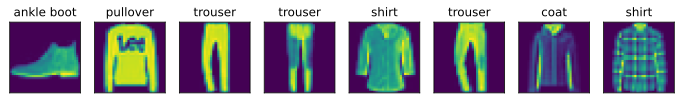

In [124]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

### 4.2.4. Summary

We now have a slightly more realistic dataset to use for classification. Fashion-MNIST is an apparel classification dataset consisting of images representing 10 categories. We will use this dataset in subsequent sections and chapters to evaluate various network designs, from a simple linear model to advanced residual networks.

Lastly, data iterators are a key component for efficient performance. For instance, we might use GPUs for efficient image decompression, video transcoding, or other preprocessing.

## 4.3. The Base Classification

In [125]:
import torch
from d2l import torch as d2l

### 4.3.1. The Classifier Class

In [126]:
class Classifier(d2l.Module):
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [127]:
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

### 4.3.2. Accuracy

In [128]:
@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

### 4.3.3. Summary

Classification is a sufficiently common problem that it warrants its own convenience functions. Of central importance in classification is the accuracy of the classifier. However, regardless of which loss function was minimized during training, it is useful to have a convenience method for assessing the accuracy of our classifier empirically.

## 4.4. Softmax Regression Implementation from Scratch

In [129]:
import torch
from d2l import torch as d2l

### 4.4.1. The Softmax

In [130]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [131]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

In [132]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1710, 0.1600, 0.1500, 0.2363, 0.2827],
         [0.2051, 0.1972, 0.2047, 0.2421, 0.1509]]),
 tensor([1., 1.]))

### 4.4.2. The Model

In [133]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [134]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

### 4.4.3. The Cross-Entropy Loss

In [135]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [136]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [137]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

### 4.4.4. Training

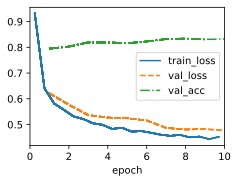

In [138]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 4.4.5. Prediction

In [139]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

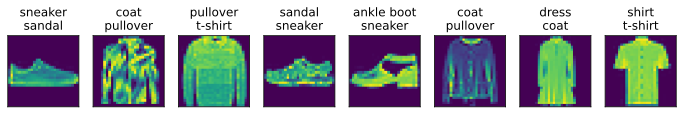

In [140]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

### 4.4.6. Summary

By now we are starting to get some experience with solving linear regression and classification problems. With it, we have reached what would arguably be the state of the art of 1960–1970s of statistical modeling. In the next section, we will show you how to leverage deep learning frameworks to implement this model much more efficiently.

# 5. Multilayer Perceptrons

## 5.1. Multilayer Perceptrons

In [141]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 5.1.1. Hidden Layers

We described affine transformations in Section 3.1.1.1 as linear transformations with added bias. To begin, recall the model architecture corresponding to our softmax regression example, illustrated in Fig. 4.1.1. This model maps inputs directly to outputs via a single affine transformation, followed by a softmax operation. If our labels truly were related to the input data by a simple affine transformation, then this approach would be sufficient. However, linearity (in affine transformations) is a strong assumption.

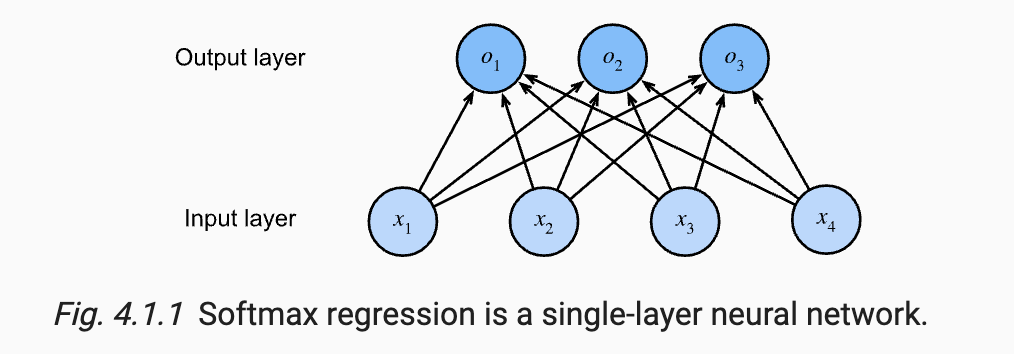

#### 5.1.1.1. Limitations of Linear Models

Linearity implies monotonicity, meaning that an increase in a feature must either always increase or decrease the model’s output. This assumption often does not hold in real-world cases. For example, the relationship between income and loan repayment likelihood is not linear. Similarly, health prediction based on body temperature does not follow a monotonic relationship.

Linear models fail in tasks like differentiating between cats and dogs, where pixel intensity changes do not correlate directly to specific categories. Nonlinearity is essential, and this is why deep neural networks use hidden layers to learn both a representation of the data and a linear predictor based on that representation.

#### 5.1.1.2. Incorporating Hidden Layers

We can overcome the limitations of linear models by incorporating one or more hidden layers. The easiest way to do this is to stack many fully connected layers on top of one another. Each layer feeds into the layer above it until we generate outputs. This architecture is commonly called a multilayer perceptron (MLP).

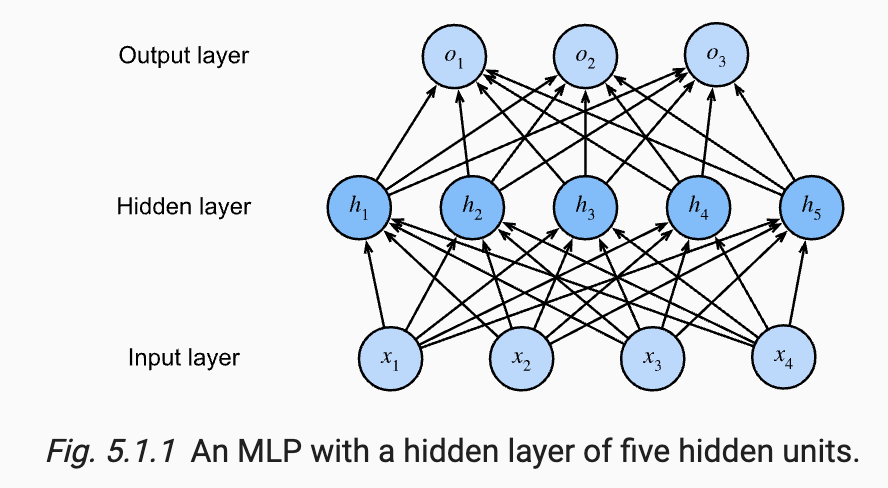

#### 5.1.1.3. From Linear to Nonlinear

As before, we denote by the matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$ a minibatch of n examples where each example has d inputs (features). For a one-hidden-layer MLP whose hidden layer has h hidden units, we denote by $\mathbf{H} \in \mathbb{R}^{n \times h}$ the outputs of the hidden layer, which are hidden representations. Since the hidden and output layers are both fully connected, we have hidden-layer weights $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$ and biases $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$, and output-layer weights $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$ and biases $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$. This allows us to calculate the outputs $\mathbf{O} \in \mathbb{R}^{n \times q}$ of the one-hidden-layer MLP as follows:

$\mathbf{H} = \mathbf{X}\mathbf{W}^{(1)} + \mathbf{b}^{(1)}$,

$\mathbf{O} = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}$.

Note that after adding the hidden layer, our model now requires us to track and update additional sets of parameters. So what have we gained in exchange? You might be surprised to find out that—in the model defined above—we gain nothing for our troubles! The reason is plain. The hidden units above are given by an affine function of the inputs, and the outputs (pre-softmax) are just an affine function of the hidden units. An affine function of an affine function is itself an affine function. Moreover, our linear model was already capable of representing any affine function.

To see this formally we can just collapse out the hidden layer in the above definition, yielding an equivalent single-layer model with parameters $\mathbf{W} = \mathbf{W}^{(1)}\mathbf{W}^{(2)} and \mathbf{b} = \mathbf{b}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}$:

$\mathbf{O} = (\mathbf{X}\mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X}\mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X}\mathbf{W} + \mathbf{b}$.

In order to realize the potential of multilayer architectures, we need one more key ingredient: a nonlinear activation function \sigma to be applied to each hidden unit following the affine transformation. For instance, a popular choice is the ReLU (rectified linear unit) activation function (Nair and Hinton, 2010) $\sigma(x) = \max(0, x)$ operating on its arguments elementwise. The outputs of activation functions $\sigma(\cdot)$ are called activations. In general, with activation functions in place, it is no longer possible to collapse our MLP into a linear model:

$\mathbf{H} = \sigma(\mathbf{X}\mathbf{W}^{(1)} + \mathbf{b}^{(1)})$,

$\mathbf{O} = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}$.

Since each row in $\mathbf{X}$ corresponds to an example in the minibatch, with some abuse of notation, we define the nonlinearity \sigma to apply to its inputs in a rowwise fashion, i.e., one example at a time. Note that we used the same notation for softmax when we denoted a rowwise operation in Section 4.1.1.3. Quite frequently the activation functions we use apply not merely rowwise but elementwise. That means that after computing the linear portion of the layer, we can calculate each activation without looking at the values taken by the other hidden units.

To build more general MLPs, we can continue stacking such hidden layers, e.g., $\mathbf{H}^{(1)} = \sigma_1(\mathbf{X}\mathbf{W}^{(1)} + \mathbf{b}^{(1)})$ and $\mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(2)})$, one atop another, yielding ever more expressive models.

### 5.1.2. Activation Functions

Activation functions decide whether a neuron should be activated or not by calculating the weighted sum and further adding bias to it. They are differentiable operators for transforming input signals to outputs, while most of them add nonlinearity. Because activation functions are fundamental to deep learning, let’s briefly survey some common ones.

#### 5.1.2.1. ReLU Function

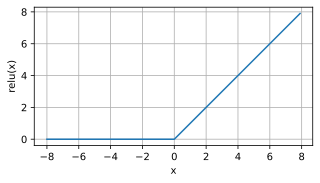

In [142]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

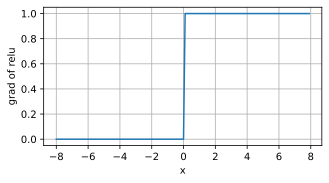

In [143]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

#### 5.1.2.2. Sigmoid Function

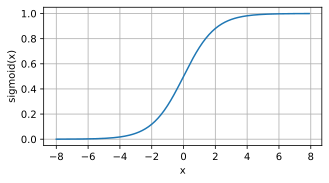

In [144]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

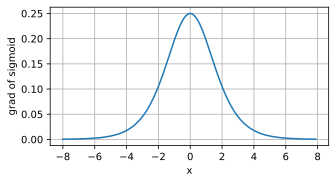

In [146]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

#### 5.1.2.3. Tanh Function

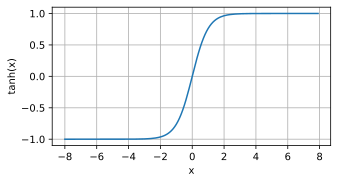

In [147]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

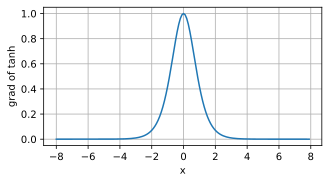

In [148]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### 5.1.3. Summary and Discussion

We now know how to incorporate nonlinearities to build expressive multilayer neural network architectures. In some ways, you have an advantage over anyone working back then, because you can leverage powerful open-source deep learning frameworks to build models rapidly, using only a few lines of code. A secondary benefit is that ReLU is significantly more amenable to optimization than the sigmoid or the tanh function. Research in activation functions has not stopped. For instance, the GELU activation function by Hendrycks and Gimpel (2016) and the Swish activation function proposed in Ramachandran et al. (2017) can yield better accuracy in many cases.

## 5.2. Implementation of Multilayer Perceptrons

In [149]:
import torch
from torch import nn
from d2l import torch as d2l

### 5.2.1. Implementation from Scratch

#### 5.2.1.1. Initializing Model Parameters

In [150]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

#### 5.2.1.2. Model

In [151]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [152]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

#### 5.2.1.3. Training

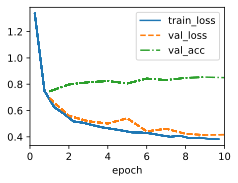

In [153]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 5.2.2. Concise Implementation

#### 5.2.2.1. Model

In [154]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

#### 5.2.2.2. Training

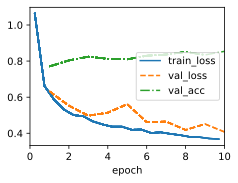

In [155]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

### 5.2.3. Summary

Now that we have more practice in designing deep networks, the step from a single to multiple layers of deep networks does not pose such a significant challenge any longer. Implementing MLPs from scratch is nonetheless messy: naming and keeping track of the model parameters makes it difficult to extend models. Moreover, if we implement the network from scratch, it is much more difficult for the framework to perform meaningful performance optimizations. Nonetheless, you have now reached the state of the art of the late 1980s when fully connected deep networks were the method of choice for neural network modeling.

### 5.2.4. Exercises

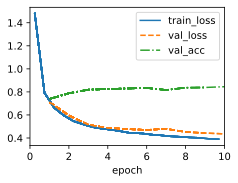

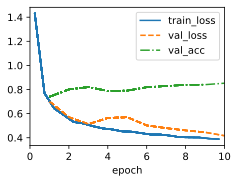

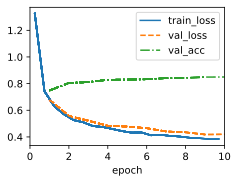

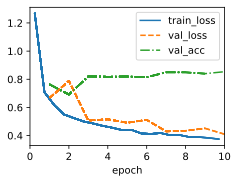

In [157]:
hidden_units_list = [64, 128, 256, 512]
accuracies = []

for num_hiddens in hidden_units_list:
    model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=num_hiddens, lr=0.1)
    trainer = d2l.Trainer(max_epochs=10)
    data = d2l.FashionMNIST(batch_size=256)
    accuracy = trainer.fit(model, data)
    accuracies.append(accuracy)

## 5.3. Forward Propagation, Backward Propagation, and Computational Graphs

### 5.3.1. Forward Propagation

Forward propagation (or forward pass) refers to the calculation and storage of intermediate variables (including outputs) for a neural network in order from the input layer to the output layer. We now work step-by-step through the mechanics of a neural network with one hidden layer. This may seem tedious but in the eternal words of funk virtuoso James Brown, you must “pay the cost to be the boss”.

For the sake of simplicity, let’s assume that the input example is $\mathbf{x} \in \mathbb{R}^{d}$ and that our hidden layer does not include a bias term. Here the intermediate variable is:

$\mathbf{z} = \mathbf{W}^{(1)}\mathbf{x}$, 

where $\mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$ is the weight parameter of the hidden layer. After running the intermediate variable $\mathbf{z} \in \mathbb{R}^{h}$ through the activation function $\phi$, we obtain our hidden activation vector of length $h$:
 
$\mathbf{h} = \phi(\mathbf{z})$. 

The hidden layer output $\mathbf{h}$ is also an intermediate variable. Assuming that the parameters of the output layer possess only a weight of $\mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$, we can obtain an output layer variable with a vector of length $q$:
  
$\mathbf{o} = \mathbf{W}^{(2)}\mathbf{h}$.
 
Assuming that the loss function is $l$ and the example label is $y$, we can then calculate the loss term for a single data example,
 
$L = l(\mathbf{o}, y)$. 

As we will see the definition of $\ell_2$ regularization to be introduced later, given the hyperparameter $\lambda$, the regularization term is
 
$s = \frac{\lambda}{2} \left( \|\mathbf{W}^{(1)}\|_F^2 + \|\mathbf{W}^{(2)}\|_F^2 \right)$, 

where the Frobenius norm of the matrix is simply the $\ell_2$ norm applied after flattening the matrix into a vector. Finally, the model’s regularized loss on a given data example is:
 
$J = L + s$. 

We refer to $J$ as the objective function in the following discussion.

### 5.3.2. Computational Graph of Forward propagation

Plotting computational graphs helps us visualize the dependencies of operators and variables within the calculation. Fig. 5.3.1 contains the graph associated with the simple network described above, where squares denote variables and circles denote operators. The lower-left corner signifies the input and the upper-right corner is the output. Notice that the directions of the arrows (which illustrate data flow) are primarily rightward and upward.

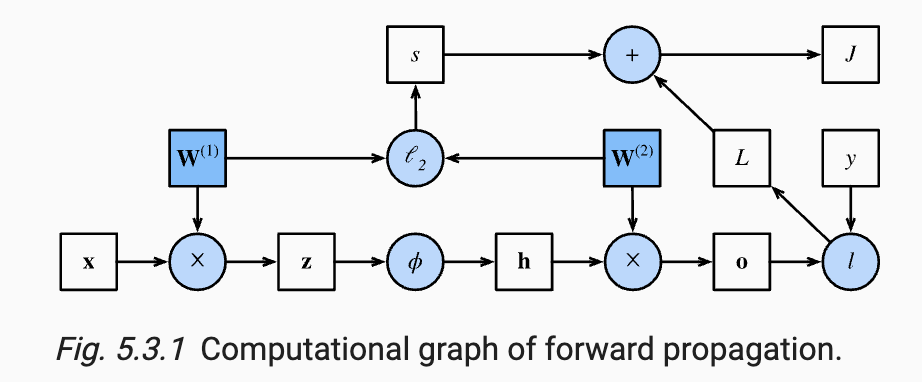

### 5.3.3. Backpropagation

Backpropagation refers to the method of calculating the gradient of neural network parameters. In short, the method traverses the network in reverse order, from the output to the input layer, according to the chain rule from calculus. The algorithm stores any intermediate variables (partial derivatives) required while calculating the gradient with respect to some parameters. Assume that we have functions $Y = f(X)$ and $Z = g(Y)$, in which the input and the output $X, Y, Z$ are tensors of arbitrary shapes. By using the chain rule, we can compute the derivative of $Z$ with respect to $X$ via
 
$\frac{\partial Z}{\partial X} = \prod \left( \frac{\partial Z}{\partial Y}, \frac{\partial Y}{\partial X} \right)$. 

Here we use the prod operator to multiply its arguments after the necessary operations, such as transposition and swapping input positions, have been carried out. For vectors, this is straightforward: it is simply matrix-matrix multiplication. For higher-dimensional tensors, we use the appropriate counterpart. The operator prod hides all the notational overhead.

Recall that the parameters of the simple network with one hidden layer, whose computational graph is in Fig. 5.3.1, are $\mathbf{W}^{(1)}$ and $\mathbf{W}^{(2)}$. The objective of backpropagation is to calculate the gradients $\frac{\partial J}{\partial \mathbf{W}^{(1)}}$ and $\frac{\partial J}{\partial \mathbf{W}^{(2)}}$. To accomplish this, we apply the chain rule and calculate, in turn, the gradient of each intermediate variable and parameter. The order of calculations is reversed relative to those performed in forward propagation, since we need to start with the outcome of the computational graph and work our way towards the parameters. The first step is to calculate the gradients of the objective function $J = L + s$ with respect to the loss term $L$ and the regularization term $s$: 

$\frac{\partial J}{\partial L} = 1 \quad \text{and} \quad \frac{\partial J}{\partial s} = 1$. 

Next, we compute the gradient of the objective function with respect to variable of the output layer o according to the chain rule: 

$\frac{\partial J}{\partial \mathbf{o}} = \prod \left( \frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}} \right) = \frac{\partial L}{\partial \mathbf{o}} \in \mathbb{R}^{q}$. 

Next, we calculate the gradients of the regularization term with respect to both parameters: 

$\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)} \quad \text{and} \quad \frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}$. 

Now we are able to calculate the gradient $\frac{\partial J}{\partial \mathbf{W}^{(2)}} \in \mathbb{R}^{q \times h}$ of the model parameters closest to the output layer. Using the chain rule yields:
 
$\frac{\partial J}{\partial \mathbf{W}^{(2)}} = \prod \left( \frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}} \right) + \prod \left( \frac{\partial s}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}} \right) = \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^{\top} + \lambda \mathbf{W}^{(2)}$.
 
To obtain the gradient with respect to $\mathbf{W}^{(1)}$ we need to continue backpropagation along the output layer to the hidden layer. The gradient with respect to the hidden layer output $\frac{\partial J}{\partial \mathbf{h}} \in \mathbb{R}^{h}$ is given by
 
$\frac{\partial J}{\partial \mathbf{h}} = \prod \left( \frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}} \right) = \mathbf{W}^{(2)} \top \frac{\partial J}{\partial \mathbf{o}}$.
 
Since the activation function $\phi$ applies elementwise, calculating the gradient $\frac{\partial J}{\partial \mathbf{z}} \in \mathbb{R}^{h}$ of the intermediate variable $\mathbf{z}$ requires that we use the elementwise multiplication operator, which we denote by $\odot$:
 
$\frac{\partial J}{\partial \mathbf{z}} = \prod \left( \frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}} \right) = \frac{\partial J}{\partial \mathbf{h}} \odot \phi{\prime}(\mathbf{z})$.

Finally, we can obtain the gradient $\frac{\partial J}{\partial \mathbf{W}^{(1)}} \in \mathbb{R}^{h \times d}$ of the model parameters closest to the input layer. According to the chain rule, we get
 
$\frac{\partial J}{\partial \mathbf{W}^{(1)}} = \prod \left( \frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}} \right) + \prod \left( \frac{\partial s}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}} \right) = \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^{\top} + \lambda \mathbf{W}^{(1)}$.

### 5.3.4. Training Neural Networks

When training neural networks, forward and backward propagation depend on each other. In forward propagation, we traverse the computational graph in the direction of dependencies, and the variables are then used for backpropagation, where the compute order on the graph is reversed. When training neural networks, once model parameters are initialized, we alternate forward propagation with backpropagation, updating model parameters using gradients given by backpropagation. Note that backpropagation reuses the stored intermediate values from forward propagation to avoid duplicate calculations. This is also one of the reasons why training requires significantly more memory than plain prediction. Training deeper networks using larger batch sizes more easily leads to out-of-memory errors.

### 5.3.5. Summary

Forward propagation sequentially calculates and stores intermediate variables within the computational graph defined by the neural network. Backpropagation sequentially calculates and stores the gradients of intermediate variables and parameters within the neural network in the reversed order. When training deep learning models, forward propagation and backpropagation are interdependent, and training requires significantly more memory than prediction.